In [3]:
import pandas as pd 
import numpy as np 
from  sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 


ModuleNotFoundError: No module named 'pandas'

In [5]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\HeartDiseaseTrain-Test.csv")
data.head(10)
data["chest_pain_type"].unique()


array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

In [6]:
data.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0


In [7]:
#data=pd.get_dummies(data,columns=['sex'],drop_first=True)


In [8]:
data.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0


In [9]:

le=LabelEncoder()
data['chest_pain_type1']=le.fit_transform(data["chest_pain_type"])
data['exercise_induced_angina1']=le.fit_transform(data["exercise_induced_angina"])
data['slope1']=le.fit_transform(data["slope"])
data['vessels_colored_by_flourosopy1']=le.fit_transform(data["vessels_colored_by_flourosopy"])
data['thalassemia1']=le.fit_transform(data["thalassemia"])
data['fasting_blood_sugar1']=le.fit_transform(data["fasting_blood_sugar"])
data['rest_ecg1']=le.fit_transform(data["rest_ecg"])
data['sex_male']=le.fit_transform(data["sex"])

In [10]:
data.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,...,thalassemia,target,chest_pain_type1,exercise_induced_angina1,slope1,vessels_colored_by_flourosopy1,thalassemia1,fasting_blood_sugar1,rest_ecg1,sex_male
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,...,Reversable Defect,0,3,0,0,3,3,1,2,1
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,...,Reversable Defect,0,3,1,2,4,3,0,1,1
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,...,Reversable Defect,0,3,1,2,4,3,1,2,1


In [11]:
x=np.array(data[['resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak','chest_pain_type1','exercise_induced_angina1','slope1','vessels_colored_by_flourosopy1','thalassemia1','fasting_blood_sugar1','rest_ecg1','sex_male']])
y=np.array(data['target'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=30)


In [12]:
model=LogisticRegression(max_iter=500)
model.fit(x,y)

LogisticRegression(max_iter=500)

In [13]:
prediction=model.predict(x_test)
prediction
# accuracy_score(prediction,y_train)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,

In [14]:
print("accuracy score",accuracy_score(y_test,prediction))
print("confusion matrix is \n",confusion_matrix(y_test,prediction))
print("classification report ",classification_report(y_test,prediction))

accuracy score 0.8341463414634146
confusion matrix is 
 [[165  44]
 [ 24 177]]
classification report                precision    recall  f1-score   support

           0       0.87      0.79      0.83       209
           1       0.80      0.88      0.84       201

    accuracy                           0.83       410
   macro avg       0.84      0.84      0.83       410
weighted avg       0.84      0.83      0.83       410



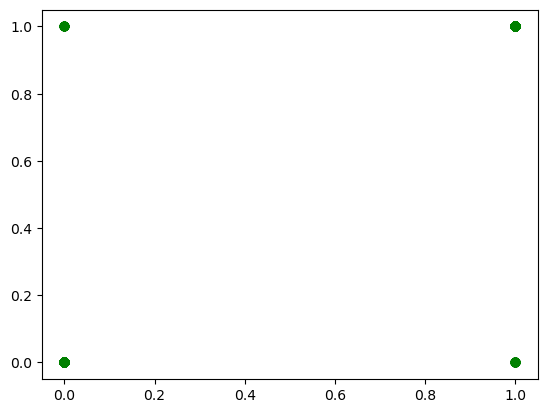

In [23]:
#sns.histplot(prediction)
plt.scatter(prediction,y_test,color='green',label="data")
plt.show()